In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [73]:
data_import = pd.read_csv("Data//data_import.csv").drop(['Unnamed: 0'], axis = 1)
data_export = pd.read_csv("Data//data_export.csv").drop(['Unnamed: 0'], axis = 1)

In [107]:
data_import = data_import.sample(frac=1)
data_import

,CreationDate,ExecDate,Date,Stock,item_ID,Cnt,difference
275,2019-11-11,2020-12-15,2021-06-08,СЗ,144.022.000662,1.0,175
2849,2021-09-29,2021-12-21,2021-12-16,СЗ,160.346.000046,2.0,-5
2231,2021-09-26,2021-12-16,2021-12-28,У,157.346.000120,2.0,12
1780,2021-07-23,2021-10-19,2021-10-22,У,277.346.000149,1.0,3
1370,2021-09-29,2021-12-21,2021-10-01,СЗ,157.346.000105,2.0,-81
...,...,...,...,...,...,...,...
1077,2021-12-02,2022-11-03,2021-12-14,СЗ,249.346.000172,4.0,-324
1798,2021-07-23,2021-10-19,2021-10-22,У,277.346.000149,1.0,3
2750,2021-08-15,2021-11-11,2021-11-23,У,244.346.000728,4.0,12
167,2019-08-21,2020-12-15,2020-02-21,СЗ,144.022.000636,3.0,-298


In [75]:
data_export


,Date_Fact,item_ID,Stock,Site,Cnt,Date_plan,SWAP,NS,difference
0,2020-09-01,144.022.000726,СЗ,78_03321,6.0,2021-08-04,0.0,1.0,-337
1,2020-09-01,144.022.000813,СЗ,78_03159,1.0,2021-06-27,0.0,1.0,-299
2,2020-09-01,248.020.000065,СЗ,78_03159,197.0,2021-06-27,0.0,1.0,-299
3,2020-09-01,132.346.000652,СЗ,78_03159,12.0,2021-06-27,0.0,1.0,-299
4,2020-09-01,144.022.000770,СЗ,78_03159,1.0,2021-06-27,0.0,1.0,-299
...,...,...,...,...,...,...,...,...,...
56010,2021-08-31,144.022.000838,СЗ,78_01388,1.0,2021-08-08,0.0,1.0,23
56011,2021-08-31,144.022.000853,СЗ,78_01388,1.0,2021-04-28,0.0,1.0,125
56012,2021-08-31,144.022.000853,СЗ,78_01388,1.0,2021-08-08,0.0,1.0,23
56013,2021-08-31,261.348.000063,СЗ,78_01388,1.0,2021-04-28,0.0,1.0,125


In [144]:
X_1 = data_export.drop(['difference'],axis=1)

In [145]:
start_value = pd.to_datetime('2010-01-01')

In [146]:
start_value

Timestamp('2010-01-01 00:00:00')

In [147]:
X_1 = X_1.drop(['Date_Fact'],axis=1)

In [148]:
X_1['Date_plan']=(pd.to_datetime(X_1['Date_plan'])-start_value).astype(str).apply(lambda x: x.replace(" days", "")).astype(int)

In [113]:
X_1['ExecDate']=(pd.to_datetime(X_1['ExecDate'])-start_value).astype(str).apply(lambda x: x.replace(" days", "")).astype(int)

In [151]:
X_1 = X_1.drop(['Site', 'item_ID'], axis=1)

In [115]:
X_1 = X_1.drop(['item_ID'], axis=1)

In [152]:
one_hot_1 = pd.get_dummies(X_1['Stock'],prefix='Stock')
# one_hot_2 = pd.get_dummies(X_1['item_ID'],prefix='item_ID')


In [153]:
# X_1 = X_1.drop(['Stock', 'item_ID'],axis=1).join([one_hot_1, one_hot_2])
X_1 = X_1.drop(['Stock'],axis=1).join([one_hot_1])

In [155]:
y_1 = data_export['difference']

In [156]:
train_size = int(len(X_1)*0.7)

In [157]:
train_size

39210

In [158]:
X_1_train = X_1.iloc[:train_size]
y_1_train = y_1.iloc[:train_size]

X_1_val = X_1.iloc[train_size:]
y_1_val = y_1.iloc[train_size:]

In [159]:
min_y_1 = y_1_train.min()
y_1_train = y_1_train - min_y_1
max_y_1 = y_1_train.max()
y_1_train /= max_y_1
y_1_train

0        0.220721
1        0.277778
2        0.277778
3        0.277778
4        0.277778
           ...   
39205    0.647147
39206    0.647147
39207    0.647147
39208    0.647147
39209    0.647147
Name: difference, Length: 39210, dtype: float64

In [160]:
y_1_val = y_1_val - min_y_1
y_1_val /= max_y_1
y_1_val

39210    0.647147
39211    0.647147
39212    0.647147
39213    0.647147
39214    0.647147
           ...   
56010    0.761261
56011    0.914414
56012    0.761261
56013    0.914414
56014    0.761261
Name: difference, Length: 16805, dtype: float64

In [161]:
X_1.dtypes

Cnt          float64
Date_plan      int32
SWAP         float64
NS           float64
Stock_СЗ       uint8
Stock_У        uint8
dtype: object

In [162]:
X_1_train['CreationDate'] -= X_1_train['CreationDate'].mean(axis=0)
X_1_train['ExecDate'] -= X_1_train['ExecDate'].mean(axis=0)
X_1_train['Cnt'] -= X_1_train['Cnt'].mean(axis=0)

KeyError: 'CreationDate'

In [163]:
X_1_train

,Cnt,Date_plan,SWAP,NS,Stock_СЗ,Stock_У
0,6.0,4233,0.0,1.0,1,0
1,1.0,4195,0.0,1.0,1,0
2,197.0,4195,0.0,1.0,1,0
3,12.0,4195,0.0,1.0,1,0
4,1.0,4195,0.0,1.0,1,0
...,...,...,...,...,...,...
39205,2.0,4174,0.0,1.0,0,1
39206,40.0,4174,0.0,1.0,0,1
39207,40.0,4174,0.0,1.0,0,1
39208,8.0,4174,0.0,1.0,0,1


In [23]:
std = X_1_train.std(axis=0)
X_1_train['CreationDate'] /= std['CreationDate']
X_1_train['ExecDate'] /= std['ExecDate']
X_1_train['Cnt'] /= std['Cnt']

C:\Users\derol\AppData\Local\Temp\ipykernel_26320\23163840.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_1_train['CreationDate'] /= std['CreationDate']
C:\Users\derol\AppData\Local\Temp\ipykernel_26320\23163840.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_1_train['ExecDate'] /= std['ExecDate']
C:\Users\derol\AppData\Local\Temp\ipykernel_26320\23163840.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

In [125]:
X_1_train

,CreationDate,ExecDate,Cnt,Stock_М,Stock_СЗ,Stock_У
275,3601,4001,1.0,0,1,0
2849,4289,4372,2.0,0,1,0
2231,4286,4367,2.0,0,0,1
1780,4221,4309,1.0,0,0,1
1370,4289,4372,2.0,0,1,0
...,...,...,...,...,...,...
235,3601,4001,1.0,0,1,0
2880,4276,4363,300.0,0,1,0
331,3601,4001,1.0,0,1,0
1033,4353,4689,24.0,0,1,0


In [48]:
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

In [126]:
X_1_train.shape[1]

6

In [167]:
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(X_1_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [168]:
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [169]:
history = model.fit(X_1_train, 
                    y_1_train, 
                    epochs=100, 
                    validation_split=0.1, 
                    verbose=2)

Epoch 1/100
1103/1103 - 2s - loss: 0.2242 - mae: 0.4418 - val_loss: 0.3246 - val_mae: 0.5556 - 2s/epoch - 2ms/step
Epoch 2/100
1103/1103 - 1s - loss: 0.2242 - mae: 0.4418 - val_loss: 0.3246 - val_mae: 0.5556 - 1s/epoch - 1ms/step
Epoch 3/100
1103/1103 - 1s - loss: 0.2242 - mae: 0.4418 - val_loss: 0.3246 - val_mae: 0.5556 - 1s/epoch - 1ms/step
Epoch 4/100
1103/1103 - 1s - loss: 0.2242 - mae: 0.4418 - val_loss: 0.3246 - val_mae: 0.5556 - 1s/epoch - 1ms/step
Epoch 5/100
1103/1103 - 1s - loss: 0.2242 - mae: 0.4418 - val_loss: 0.3246 - val_mae: 0.5556 - 1s/epoch - 1ms/step
Epoch 6/100
1103/1103 - 1s - loss: 0.2242 - mae: 0.4418 - val_loss: 0.3246 - val_mae: 0.5556 - 1s/epoch - 1ms/step
Epoch 7/100
1103/1103 - 1s - loss: 0.2242 - mae: 0.4418 - val_loss: 0.3246 - val_mae: 0.5556 - 1s/epoch - 1ms/step
Epoch 8/100
1103/1103 - 1s - loss: 0.2242 - mae: 0.4418 - val_loss: 0.3246 - val_mae: 0.5556 - 1s/epoch - 1ms/step
Epoch 9/100
1103/1103 - 1s - loss: 0.2242 - mae: 0.4418 - val_loss: 0.3246 - val

In [170]:
pred = model.predict(X_1_val).flatten() 

526/526 [==============================] - 1s 938us/step


In [171]:
pred = pred * max_y_1 + min_y_1 
y_1_val = y_1_val * max_y_1 + min_y_1

In [172]:
err = np.mean(abs(pred - y_1_val))
err

420.06099375185954

In [173]:
print(np.mean(y_1_val))

-63.93900624814044


In [174]:
history.history

{'loss': [0.22419056296348572,
  0.22419053316116333,
  0.22419056296348572,
  0.2241906076669693,
  0.2241905927658081,
  0.22419042885303497,
  0.22419051826000214,
  0.2241906374692917,
  0.22419051826000214,
  0.22419045865535736,
  0.22419080138206482,
  0.22419051826000214,
  0.22419050335884094,
  0.22419053316116333,
  0.22419053316116333,
  0.22419050335884094,
  0.2241905927658081,
  0.22419048845767975,
  0.2241903841495514,
  0.22419065237045288,
  0.22419075667858124,
  0.22419042885303497,
  0.22419042885303497,
  0.22419066727161407,
  0.22419056296348572,
  0.22419053316116333,
  0.224190354347229,
  0.22419050335884094,
  0.22419056296348572,
  0.224190354347229,
  0.22419027984142303,
  0.22419053316116333,
  0.22419039905071259,
  0.22419072687625885,
  0.22419041395187378,
  0.22419048845767975,
  0.22419065237045288,
  0.22419066727161407,
  0.22419050335884094,
  0.22419080138206482,
  0.22419053316116333,
  0.22419041395187378,
  0.22419039905071259,
  0.22419042

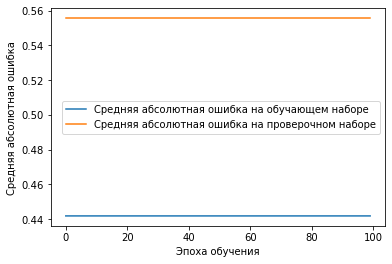

In [175]:
plt.plot(history.history['mae'], 
         label='Средняя абсолютная ошибка на обучающем наборе')
plt.plot(history.history['val_mae'], 
         label='Средняя абсолютная ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Средняя абсолютная ошибка')
plt.legend()
plt.show()